# Integration

# Two Main Types of Numerical Integration: Definite Integrals
Within this type of integration, there are two **more** scenarios to consider
### Analytic Function, but Impossible to Find an Antiderivative, or "Black Box" Function
Function that cannot be easily anti-differentiated, like
$$ \int_{0}^3 e^{-x}\sin(x^2)\,dx $$

Or, function is a "black box" (maybe its the output of some other program), and we thus cannot find an anti-derivative, but we *can* generate an arbitrary number of $(x,y)$ pairs.

### Discrete Data Points
Data is the result of an experiment, so we don't have a function, and we cannot even generate more data points. We must make do with what we are given. Example: from an experiment, you have velocity as a function of time, but want to calulate displacement.

# Two Main Types of Numerical Integration: Numerical Solutions to Differential Equations
Given some differential equations (equation involving a function and its derivatives), solve for various *functions*. For instance,

$$ (2.2\,\mathrm{kg})\frac{d^2x}{dt^2} + \left(200\,\mathrm{\frac{N}{m}}\right)x(t) = 0$$

This is the differential equation that relates the position of a harmonic oscillator with its acceleration. If we could "integrate" this equation from some initial conditions, say $x(0) = 5\,{\mathrm{m}}$ and $v(0) = x^\prime(0) = 0$, we could determine the position of the oscillator $x$ at any time $t$.

We'll deal with these later; first up is more traditional "integration".

# Methods of Integration: Riemann Integration
We've beaten Riemann Integration to death in this class, but as a reminder, this is when we divide the domain into many pieces, and then sum up the areas of rectangles formed by these regions. The widths of the rectangles are the distances between adjacent $x$ values, the the heights are taken as the value of the function evaluated at one of the endpoints (or the midpoint).

No cheater function in `numpy` or `scipy` to do this, but you already know how to create your own riemann integrator, which is much easier with `numpy` arrays.

The next slide shows an example with way too few rectangles.

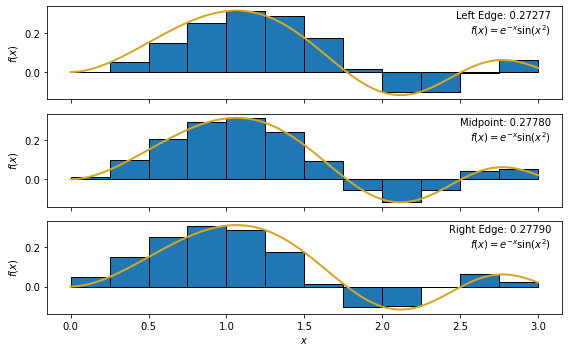

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# function we want approximate integrals for
f = lambda x: np.exp(-x) * np.sin(x**2)
f_string = '$f(x) = e^{-x}\sin(x^2)$'

# create 12 regions (13 points) over the domain (0 to 3 in this example)
a = 0
b = 3
xs_bar, dx = np.linspace(a, b, 13, retstep=True)

# get heights of rectangles using left edge, midpoint, and right end point for each rectangel
ys_bar_left = f(xs_bar[:-1])
ys_bar_mid = f((xs_bar[:-1] + xs_bar[1:]) / 2.0)
ys_bar_right = f(xs_bar[1:])
ys_bar = (ys_bar_left, ys_bar_mid, ys_bar_right)

# sum up rectangle areas for each set of rectangles
sums = [np.sum(dx * ys) for ys in ys_bar]

# for creating labels in the subplots
labels = ('Left Edge', 'Midpoint', 'Right Edge')

# smooth data for the "real" function
xs_smooth = np.linspace(0, 3, 100)
ys_smooth = f(xs_smooth)

# create a 3-panel figure to show the three methods
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 5))

# plot rectangles as blue bars, function as gold line, and show label, including sum, in the upper right
for ax, ys, label, app_sum in zip(axes, ys_bar, labels, sums):
    ax.bar(xs_bar[:-1], ys, width=dx, align='edge', edgecolor='black')
    ax.plot(xs_smooth, ys_smooth, color='Goldenrod', lw=2)
    ax.set_ylabel('$f(x)$')
    ax.text(0.98, 0.96, '{}: {:.5f}\n{}'.format(label, app_sum, f_string), ha='right', va='top', transform=ax.transAxes)
axes[-1].set_xlabel('$x$')

# tighten things up a bit, and then save to png
plt.tight_layout()
fig.savefig('riemann_panels.png', dpi=150, bbox_inches='tight')

# The choice of Riemann sums only matters for small numbers of rectangles
![riemann sum panels](riemann_panels.png)

# Trapezoidal Integration is a great tool when dealing with discrete data
Suppose you have a dataset rather than a function, and you need to integrate it. Then you are stuck with either right-handed or left-handed Riemann integration.

There's another option, though, which is what we did in a previous homework set: the trapezoid rule. We use the two points on the $x$-axis as well as the left *and* right points along the function curve to define a trapezoid, which has an area of

$$ A_{\rm trap} = \frac{1}{2} b (h_1 + h_2)$$

Since the base $b$ is just the width of the rectangle, $\Delta x$ and the heights are just the values of the functions $y_{\rm left}$ and $y_{\rm right}$. Thus, the factor of $\frac{1}{2}(y_1+y_2)$ is just the average of the two heights, which is what we used in problem set 11 (arrays; Riemann Integration Revisited).

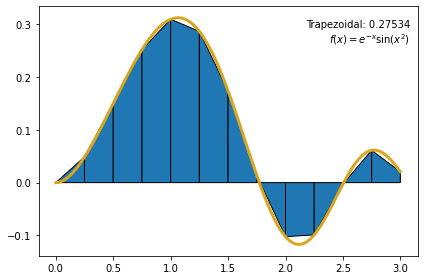

In [123]:
import matplotlib.patches as patches
fig, ax = plt.subplots()

# plotting trapezoids is harder... need to create each shape as a series of x,y pairs
xy_points = []
for xleft, xright, yleft, yright in zip(xs_bar[:-1], xs_bar[1:], f(xs_bar[:-1]), f(xs_bar[1:])):
    ax.add_patch(patches.Polygon(xy=list(zip([xleft, xleft, xright, xright],[0, yleft, yright, 0])), ec='black'))
ax.plot(xs_smooth, ys_smooth, color='goldenrod', lw=3)
ax.text(0.98, 0.95, 'Trapezoidal: {:.5f}\n{}'.format(np.trapz(f(xs_bar), xs_bar), f_string), ha='right', va='top', transform=ax.transAxes)
plt.tight_layout()

fig.savefig('trapezoidal.png', dpi=150, bbox_inches='tight')

# `numpy` has you covered: `trapz`

<img width="50%" alt="Area under a function broken down into trapezoids" src="trapezoidal.png" style='float: left;'>
<p>
    Give it $y$ and then $x$ values, and <code>np.trapz</code> will do the sum of the trapezoidal areas: 
<p>
<code>area = np.trapz(ys, xs)</code>
</p>
<p>
Plotting this is a bit harder, though (see previous cell if you're curious).
    </p>



# Better, but More Complicated: Simpson's Rule
<div>
    <img alt="shaded areas of approximated polynomials of a function" src="simpson.png" style='float:left; width:50%'> 
    <p> <strong>The idea</strong>: Take pairs of intervals (so regions defined by <b>3</b> points), and approximate the function passing through each three points as a parabola. Then do a bunch of simple quadratic definite integrals. See a simple example in the next cell.
    </p>
    <p>
      Cheater function is in <code>scipy</code>'s <code>integrate</code> submodule <code>scipy.integrate.simps(ys, xs)</code>
    </p>
</div>

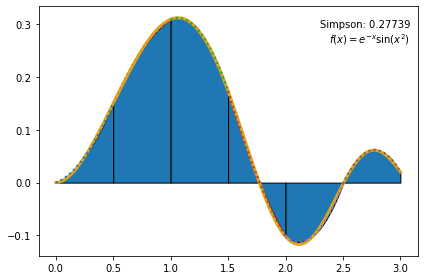

In [124]:
fig, ax = plt.subplots()
ax.plot(xs_smooth, ys_smooth, color='goldenrod', lw=3)

# keep track of area as we go along
area = 0

# loop over the pairs of regions (so every other point is now a "left" point;
# must have an odd number of points/even number of REGIONS to make this work)
for i in range(0, len(xs_bar) - 2, 2):
    # grab three consecutive points and their corresponding y-values
    xs = xs_bar[i:i+3]
    ys = f(xs)
    
    # ask numpy for a degree 2 polynomial fit; gives coefficients in
    # descending order of degree (quadratic, linear, constant)
    coeffs = np.polyfit(xs, ys, 2)
    
    # do some jank calculus to get the area under the curve
    a, b = xs[0], xs[-1]
    # the anti-derivative as a function (reverse power rule)
    # reversed the coefficients, so the index of each coefficient would
    # coincide with the degree (0th term is the constant coefficient,
    # 1st term is the linear, etc.)
    P = lambda x: sum([coeff / (i + 1) * x**(i+1) for i, coeff in enumerate(reversed(coeffs))])
    # the definite integral of this region
    area += (P(b) - P(a))
    
    # create smooth points along the approximate polynomial, plot them as
    # dotted line, and then fill between the x-axis and the polynomial
    interval_xs = np.linspace(min(xs), max(xs))
    interval_ys = coeffs[2] + coeffs[1] * interval_xs + coeffs[0] * interval_xs**2
    ax.plot(interval_xs, interval_ys, ls=':', lw=2)
    ax.fill_between(interval_xs, interval_ys, color='C0', ec='black', zorder=-5)

ax.text(0.98, 0.95, 'Simpson: {:.5f}\n{}'.format(area, f_string), ha='right', va='top', transform=ax.transAxes)

plt.tight_layout()
fig.savefig('simpson.png', dpi=150, bbox_inches='tight')


# The Most Complicated, but Best Option for a Smooth Function: Gaussian Quadrature

**Carl Friedrich Gauss** realized a sort of "best case Simpson's Rule", where he could minimize the error by using some very special polynomials. Yep, it's the Legendre polynomials again. For a well-behaved function over the interval \[-1,1\], he found he could approximate the integral to shockingly high precision with very few ($n$) points via

$$\int_{-1}^1 f(x)\,dx = \sum_{i=1}^n w_i f(x_i)$$

where the **weights** $w_i$ are given by

$$ w_i = \frac{2}{(1 - x_i^2)[P_n^\prime(x_i)]^2}$$

and $x_i$ are the **roots** of the $n$<sup>th</sup> Legendre polynomial (where $P_n(x_i) = 0$).

# Example: Gaussian Quadrature By Hand
Compute the following integral using Gaussian quadrature with just two points, and then check the answer by doing it by hand.

$$\int_{-1}^1 (3x^3 + 2x^2 - 5)dx = \sum_{i=1}^nw_i(3x_i^3 + 2x_i^2 - 5)$$

Recall that
$$ w_i = \frac{2}{(1 - x_i^2)[P_n^\prime(x_i)]^2},$$

but typically we just look up these weights in a table since they are *independent of the function*. You really just need to look up the roots and their associated weights, and then compute the weighted sum of the values of the function at the roots of the $n$<sup>th</sup> Legendre function. You will find [wikipedia's table of roots of the Legendre polynomials and the corresponding weights](https://en.wikipedia.org/wiki/Gaussian_quadrature#Gauss–Legendre_quadrature) helpful.

# What is this witchcraft?!
It turns out that *n*-point Gaussian quadrature is ***exact*** for polynomials of order 2*n*–1 and below, which is kind of ridculous. To get an exact integral of a 11<sup>th</sup> degree polynomial, you only need to know 5 values of the polynomial.

Still, integrating polynomials is not that hard to do by hand. The real value for Gaussian quadrature is that it requires so few points to get shockingly accurate results, even for transcendental functions.

Before we had computers to compute millions of rectangles, this was *essential*, because computing 10,000 points or more was not exactly feasible.


# But... my interval is not –1 to +1.
Don't worry! We can just rescale the integral to one that is:

$$\int_a^bf(x)\,dx = \frac{b-a}{2}\int_{-1}^1f\left(\frac{b-a}{2}\xi + \frac{a+b}{2}\right)d\xi$$

Here we've just done a substitution where
$$x = \frac{b-a}{2}\xi + \frac{a+b}{2} \qquad dx = \frac{b-a}{2}d\xi$$

You can see that when $x=a$, $\xi=-1$, and when $x=b$, $\xi=1$. The main price we have to pay is that our function now has this scaling and shifting, and the overall result is modulated by $(b-a)/2$, but other than that, it's Gaussian quadrature to the rescue!

# Gaussian Quadrature in `scipy`
This is a powerful tool, but `scipy.integrate`'s `quad` function makes it extremely trivial to use.

You give `scipy.integrate.quad` a function as its first argument, a left endpoint, a right endpoint, and then any additional arguments the function needs (if the function takes multiple arguments, that is; if it's a function of one variable, you can just skip that). Notably, you don't need to fool around with the number of points, the weights, the roots, etc.

## Return values
`quad` yields back two values:
- The approximate definite integral
- An upper bound on the error in the definite integral

So be careful when "catching" results, since `quad` will always hand back two!

# Example: Gaussian Quadrature with Our Old Function
Use `quad` to compute the definite integral of
$$f(x) = e^{-x}\sin(x^2)$$
over from $x=0$ to $x=3$, and report the uncertainty in the result. Don't forget to import the `quad` function from the appropriate submodule!

In [102]:
# TODO: Compute the integral using quad

The integral is 0.276956132088966 ± 4.29e-15


# `dblquad`, `tplquad`, and `nquad` Compute Higher Dimensional Integrals
Suppose we want to compute the integral
$$\int_{0}^1\int_0^{1 - x}\int_{0}^{1 - x - y}(5x - 3y)\,dz\,dy\,dx$$
Now the limits of the various integrals are not in general constant values, but they are functions of the other integration variables.

The calling sequences of `dblquad` and `tplquad` are similar to `quad`, with more arguments for the limits. However, the **limits after the first two must be functions, even if they are constants**.

In [112]:
from scipy.integrate import tplquad
res, err = tplquad(lambda x, y, z: 5 * x - 3 * y, 0, 1, lambda x: 0, lambda x: 1 - x, lambda x, y: 0, lambda x, y: 1 - x - y)
res, err

(0.08333333333333334, 2.744343115711484e-14)

# Ordinary Differential Equations

# Setup: What are Ordinary Differential Equations?
**Ordinary differential equations (ODEs)**: are equations that involve one or more unknown functions, their variables, and their derivatives.

A **First Order ODE** is an ODE with the highest derivative being the first derivative of the function.

$$\frac{dx}{dt} = -x^3 + \sin(t)$$

A **Second Order ODE** is an ODE with the highest derivative being the seecond derivative of the function. These are extremely common in physics.
$$m\frac{d^2x}{dt^2} = -kx$$

There are many tricks to solving these "by hand" **analytically** (see MATH 312), but we want to find **numerical** solutions. That is, can I get an array of times and an array of values of the function to plot, even if I don't know the actual functional form?

# The Euler Method: An Intuitive, But Bad, Approach
Let's start with a first-order ODE:

$$\frac{dx}{dt} = -x^3 + \sin(t) = f(t, x)$$

We want to find what the function $x(t)$ looks like. Suppose also that we do know that $x(0) = 0$ (an **initial condition**). How might we find the value of $x$ at some time later... say $t=10$?

To approach this problem, we will break the time domain into tiny steps, called **timesteps** (and we might use this terminology even if we aren't dealing with a function of time). So at timestep 0 ($t=0$), we have $x=0$ and $dx/dt = -(0)^3 + \sin(0) = 0$. Now to get to the next timestep, we assume the derivative is constant, or that the function is linear with a slope equal to the local derivative:

$$x_{n+1} = x_n + \left(\frac{dx}{dt}\right)_ndt = x_n + f(t_n, x_n)dt$$

After enough timesteps, we have "integrated" to the time we want, and we'll have the values of $x(t)$ up to that point.

# Example: Euler's Method (Solution at End)
Goal: Use Euler's Method to compute and plot the values of $x(t)$ up to $t=10$ for the ODE

$$\frac{d^2x}{dt^2} = f(t,x) = -x^3 + \sin(t);\qquad x(0) = 0$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

f = lambda t, x: -x**3 + np.sin(t)

# initial condition
xi = 0
# TODO: Calculate values of x and t from t = 0 to t = 10, and then plot them

# Next few cells are additional background and examples; not necessary, and we won't cover them in class.

## The Second-Order Runge-Kutta Method
This looks like a nice solution, but it's actually a pretty poor way to solve an ODE. This is because the value of each step is due to the derivative at the _beginning_ of the timestep. In reality, some sort of average derivative over the whole time interval between timesteps would be ideal. In the limit of smaller and smaller timesteps, this wouldn't matter, but taking the "average" value to be the value at the beginning is about the worst thing we can do.

Second-order Runge Kutta improves upon this by approximating the derivative at the middle of the timestep. However, we don't actually know that derivative (because knowing the derivative requires known the time, which is ok, and knowing the position, which is essentially the thing we are trying to get at!). To get around this, we will use the Euler method to approximate the value of the function halfway through the timestep, and then we will use _that_ to get the derivative in the middle of the timestep, getting a better estimate.

$$k_1 = f(x_n, t_n)\Delta t$$
$$k_2 = f\left(x + \frac{1}{2}k_1, t + \frac{1}{2}\Delta t\right)\Delta t$$
$$x_{n+1} = x_n + k_2$$

Note the part (calculating $k_1$ is essentially using the Euler method to get the change in $x$ after one timestep. We then take half of that difference, add it to the current value of $x$, and use that to find the derivative of the function halfway through the timestep in calculating $k_2$. We then use the change in $x$ using this derivative ($k_2$) to add to the previous value of $x$.

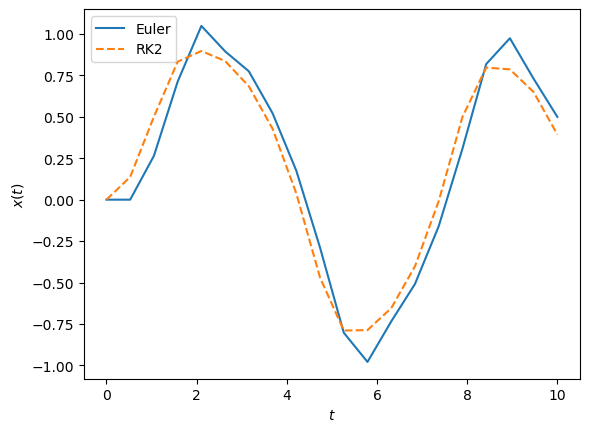

In [13]:
# use same timesteps, initial condtions, and function as Euler method calculation (don't change them)

# set up array of solution values
xs_rk2 = np.zeros_like(ts)
xs_rk2[0] = xi

# iterate through times, adding new position for each time
# note, we skip the last time since each step through the loop
# calculates the NEXT value of x
for i in range(0, len(ts) - 1):
    k_1 = f(ts[i], xs_rk2[i]) * dt
    k_2 = f(ts[i] + dt/ 2.0, xs_rk2[i] + k_1 / 2.0) * dt
    xs_rk2[i + 1] = xs_rk2[i] + k_2
    
# now we're done! plot the solution
fig, ax = plt.subplots(1, 1)
ax.plot(ts, xs_euler, label='Euler')
ax.plot(ts, xs_rk2, ls='--', label='RK2')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.legend(loc='best')

## Fourth-Order Runge-Kutta Method (RK4)
The second-order Runge-Kutta solution is definitely more accurate than the Euler method solution by making the relatively simple change to the calculation of the derivative. We can actually do better. We could keep making tighter and tighter approximations to get the "average" derivative over a timestep. The cost is that we have more and more intermediate calcuations. The "sweet spot" for most application is the fourth-order Runge-Kutta method, or simply RK4, which works like this:

$$k_1 = f(x_n, t_n)\Delta t$$
$$k_2 = f\left(x+\frac{1}{2}k_1, t+\frac{1}{2}\Delta t\right)\Delta t$$
$$k_3 = f\left(x+\frac{1}{2}k_2, t+\frac{1}{2}\Delta t\right)\Delta t$$
$$k_4 = f(x+k_3, t+\Delta t)\Delta t$$
$$x_{n+1} = x_n + \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)$$
You can see, the final "derivative" used is a sort of weighted average of each of the approximations. We won't cover in detail how we got to this approximation, but it is quite powerful.

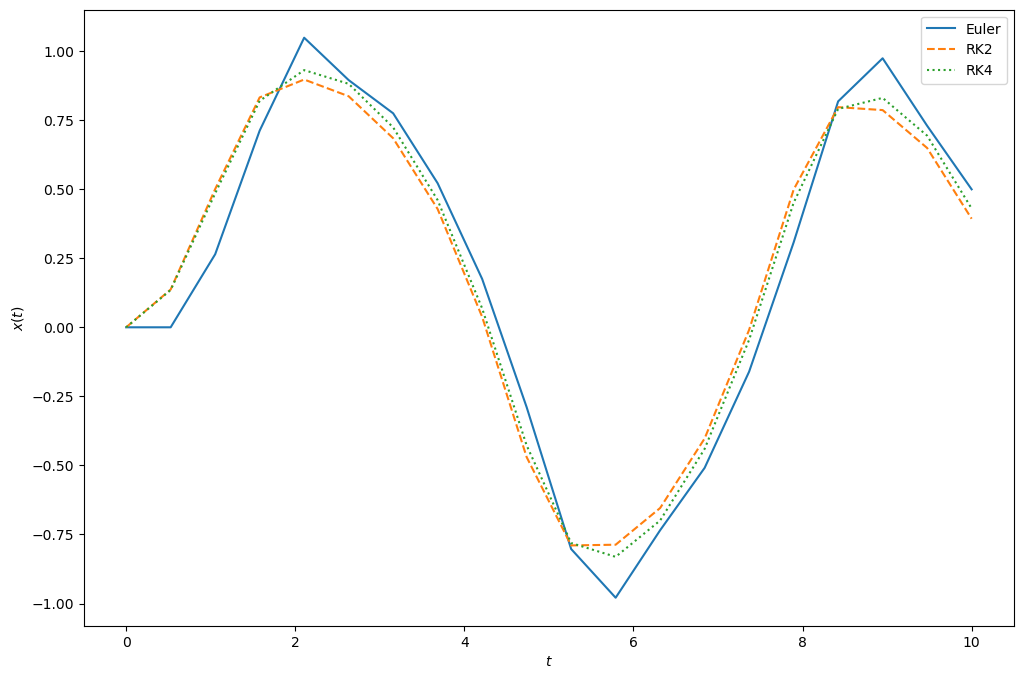

In [14]:
# use same timesteps, initial condtions as Euler method calculation (don't change them)

# set up array of solution values
xs_rk4 = np.zeros_like(ts)
xs_rk4[0] = xi

# iterate through times, adding new position for each time
# note, we skip the last time since each step through the loop
# calculates the NEXT value of x
for i in range(0, len(ts) - 1):
    k_1 = f(ts[i], xs_rk4[i]) * dt
    k_2 = f(ts[i] + dt / 2.0, xs_rk4[i] + k_1 / 2.0) * dt
    k_3 = f(ts[i] + dt / 2.0, xs_rk4[i] + k_2 / 2.0) * dt
    k_4 = f(ts[i] + dt, xs_rk4[i] + k_3) * dt
    xs_rk4[i + 1] = xs_rk4[i] + (1.0 / 6.0) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
# now we're done! plot the solution
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(ts, xs_euler, label='Euler')
ax.plot(ts, xs_rk2, ls='--', label='RK2')
ax.plot(ts, xs_rk4, ls=':', label='RK4')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.legend(loc='best')

# The "Cheater" Method: Use `scipy.integrate`'s `solve_ivp` function
IVP = Initial Value Problem. This is the type of ODE solution where we know some initial value, and we want to integrate out from there.

## Parameters
- `fun`: a function; the function on the right side of the ODE ($f(t, x)$ in our example. First argument should be the "time"-like variable, and second should be the value of the function ($x(t)$ in our example).
- `t_span`: tuple of two floats, the beginning and ending values of time to be integrated over
- `y0`: array of initial values (initial value for simple problems will just have one element)

# The "Cheater" Method: Use `scipy.integrate`'s `solve_ivp` function
## Notable Optional Parameters
- `method`: string indicating which method of integration (defaults to 5th order Runge-Kutta)
- `t_eval`: array of time points over which to make sure we evaluate the function. Without this, you're at the mercy of `solve_ivp`'s algorithm, which will usually give out very few, but highly accurate points.
- `dense_output`: boolean. If `True`, returns a function rather than discrete points
- `vectorized`: boolean. If `True`, it assumes that `fun` is vectorized (useful for solving systems of equations)

# The "Cheater" Method: Use `scipy.integrate`'s `solve_ivp` function

## Return value of `solve_ivp`
It returns an **object**, not a tuple, so we need to know the attributes of this object. These are the most notable attributes.
- `t`: array of time points (if you specify `t_eval`, this should be the same)
- `y`: 2D array of function values corresponding to the times in `t`
- `sol`: the function-like object returned if `dense_output` was set to `True`

So to plot a result, you might do something like
```python
sol = solve_ivp(f, (t_start, t_stop), y0)
plt.plot(sol.t, sol.y[0,:])
```

# Example: Using `solve_ivp` to get a solution
Solve the same differential equation for $x(t)$ using `solve_ivp` over the interval $t=0$ to $t=10$.

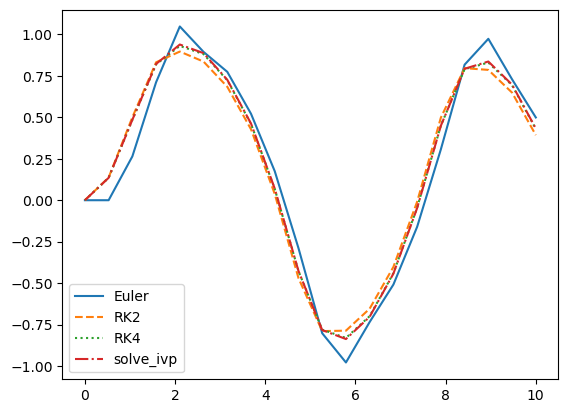

In [21]:
# TODO: solve ODE for x(t) and plot it, along with other strategies from before
# (execute the optional Runge-Kutta cells if you skipped them)
from scipy.integrate import solve_ivp

# ODES with more than one variable
Suppose we have a *system* of ODES, involving multiple variables. We'll study the famous **Lorenz Equations**, which are part of a simplified model of weather (something to do with convection in the atmosphere):

$$\frac{dx}{dt}=\sigma(y-x),\qquad \frac{dy}{dt} = rx - y - xz,\qquad \frac{dz}{dt} = xy - bz$$

Where $\sigma$, $r$, and $b$ are all parameters (constants). We'll use $\sigma=10$, $r=28$ and $b=8/3$.

Note here how the derivatives of all three variables ($x$, $y$ and $z$) depend on the values of the other variables. None are explicitly dependent on time, but that could also be the case.

**The Goal:** Generate arrays of times, as well as values of $x$, $y$, and $z$, starting from some values for time (probably zero), $x_0$, $y_0$, and $z_0$.

# The Strategy: More of the Same, but Vectorized
While still a bad choice, the Euler Method still works conceptually:

$$x_{n+1} = x_n + f_x(t_n, x_n, y_n, z_n)dt$$
$$y_{n+1} = y_n + f_y(t_n, x_n, y_n, z_n)dt$$
$$z_{n+1} = z_n + f_z(t_n, x_n, y_n, z_n)dt$$

where the $f_i$ functions are the derivatives of variable $i$. To clean this up, let's define a vector $\mathbf{x}$ that encompasses all three variables, and a function $\mathbf{f}(t, \mathbf{x})$, that takes in the current state and returns a vector of derivatives.
$$\mathbf{x}_n = \begin{pmatrix}x_n\\y_n\\z_n\end{pmatrix}; \qquad \mathbf{f}(t, \mathbf{x}) = \begin{pmatrix}\frac{dx}{dt}\\\frac{dy}{dt}\\\frac{dz}{dt}\end{pmatrix}$$
and so, the Euler step becomes
$$\mathbf{x}_{n+1} = \mathbf{x}_n + \mathbf{f}(t_n, \mathbf{x}_n)$$

# Translating this to Scipy
`solve_ivp` works *nearly identically* for a system of equations. Our initial state is simply an array of initial values, $f$ is now a function that takes in a time as well as a **vector** of values, and the return value's `y` attribute now makes more sense, as it will shape of $(n, m)$ where $n$ is the number of timesteps, and $m$ is the number of functions we are solving for.

Here's the workflow:
- Define a `numpy` array of starting values for the various functions
- Define a function that takes in two arguments (time and an array of current values of the various functions) and returns a `numpy` array of values of the functions' derivatives
- Set the `vectorized` keyword to `True` (this tells is that our function expects an array input and gives an array output), and call `solve_ivp` with the function as the first argument, some two-tuple of starting and ending times (like before), and the array of starting values.

# Example: The Lorenz Equations
Solve for $x(t)$, $y(t)$, and $z(t)$ for the Lorenz equations to a time of 50, and then make a plot of $z$ vs. $x$. Assume starting conditions of $x_i=0$, $y_i=1$, $z_i=0$, and $t_i = 0$.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# fixed parameters
sigma = 10
r = 28
b = 8.0/3.0

# the lorenz equations; set up to take time and vector in order of x, y, z
# so y - x becomes x_vec[1] - x_vec[0]
f_x = lambda t, x_vec: sigma * (x_vec[1] - x_vec[0])
f_y = lambda t, x_vec: r * x_vec[0] - x_vec[1] - x_vec[0] * x_vec[2]
f_z = lambda t, x_vec: x_vec[0] * x_vec[1] - b * x_vec[2]

# TODO: Make plot of z vs x after solving this system of equations

# Second-Order ODEs: Nothing More Than Two Coupled First-Order ODEs!
Next we'll tackle the classic problem of the undamped, undriven harmonic oscillator:

$$ F = ma = m\frac{d^2x}{dt^2} = -kx$$

We know how to deal with first-order ODEs now, but this is a second order ODE. Or is it? What if we instead consider the acceleration to be the **first derivative of the velocity**?

$$ m\frac{dv}{dt} = -kx$$

Now it looks like a first-order ODE, but I've introduced a new variable, so I need a new equation. The solution is so simple it might not seem obvious...

# The Answer: Use the Definition of Velocity
The definiton of velocity is itself a first-order ODE involving position and velocity:
$$ \frac{dx}{dt} = v$$

We simply use the definition of velocity to create a second first-order ODE. So now we have a system of two first-order ODEs in two variables, $x$ and $v$. Putting this in our vectorized notation, we get

$$\mathbf{f}(t, \mathbf{x}) = \begin{pmatrix}\frac{dx}{dt}\\\frac{dv}{dt}\end{pmatrix} = \begin{pmatrix}v\\-\frac{k}{m}x\end{pmatrix}$$

So once we know the initial conditions for **both position and velocity**, we can solve this like any other system of first-order ODEs. As a bonus, we get the velocity as a function of time for free!

# The Takeaway
When facing a second-order ODE, you can numerically solve it by converting it to a system of two first-order ODEs. Do this by writing the second derivative as the derivative of the first derivative (but call it a new variable, like $v$), and then use the definition of this new variable (set it equal to the first derivative of the original variable) as the second equation.

For instance, 
$$\frac{d^2x}{dt^2} = \left(\frac{dx}{dt}\right)^2 + 3\frac{t}{x(t)}$$

Becomes the system
$$\frac{dv}{dt} = v(t)^2 + 3\frac{t}{x(t)}$$
$$\frac{dx}{dt} = v(t)$$

# Example: The Harmonic Oscillator
Plot the position vs time for a harmonic oscillator with spring constant $k=750\,\mathrm{N/m}$ and mass $m=1.5\,\mathrm{kg}$ within an initial displacement of 25 cm and an initial speed of 0 m/s. Plot this over a time window of 1 second, and also show the analytic solution over this range:
$$x(t) = x_0\cos\left(\sqrt{\frac{k}{m}}t\right)$$

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

k = 750    # N/m
m = 1.5    # kg
x0 = 0.25  # m
v0 = 0.0   # m/s

# TODO: Solve ODE for positions, then plot position vs time, and
# compare to analytic ("known") solution

# Solutions (but try them first!)

# Gaussian Quadrature

In [153]:
from scipy.integrate import quad
f = lambda x: np.exp(-x) * np.sin(x**2)
sol, err = quad(f, 0, 3)
print('The integral is {:.15f} ± {:.2e}'.format(sol, err))

The integral is 0.276956132088966 ± 4.29e-15


# 1D Euler Method

Text(0, 0.5, '$x(t)$')

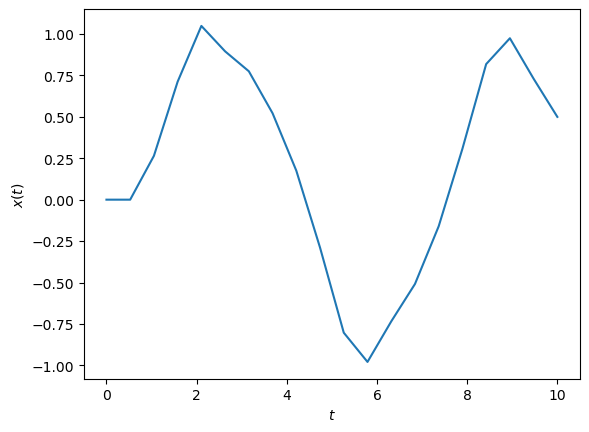

In [11]:
# the right-hand side of the ODE
f = lambda t, x: -x**3 + np.sin(t)
# the initial value of x
xi = 0

# total number of points to use... could play with this
# higher values = better results, but slower calculation
n_points = 20

# get time points, but hold on to separation in dt
# (retstep = True does this)
ts, dt = np.linspace(0, 10, n_points, retstep=True)

# initialize empty array of function values to hold on
# to solution; initialize zeroth element to initial condition
xs_euler = np.zeros_like(ts)
xs_euler[0] = xi

# take series of Euler steps to populate array. Note: only need
# times up next-to-last value since time n gets us position n+1.
for i, t in enumerate(ts[:-1]):
    xs_euler[i + 1] = xs_euler[i] + dt * f(t, xs_euler[i])

# plot the results!
plt.plot(ts, xs_euler)
plt.xlabel('$t$')
plt.ylabel('$x(t)$')

## 1D `solve_ivp`

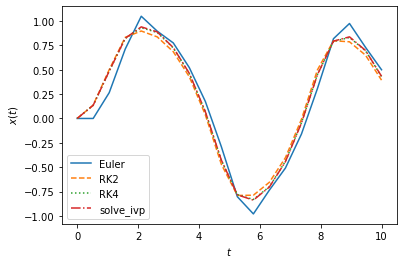

In [155]:
# set up context; note, ts, xs_euler, xs_rk2, and xs_rk4 were initialized
# in earlier cells, so you might need those
f = lambda t, x: -x**3 + np.sin(t)

sol = solve_ivp(f, (0, 10), np.array([xi]), t_eval=ts)

fig, ax = plt.subplots()
ax.plot(ts, xs_euler, label='Euler')
ax.plot(ts, xs_rk2, ls='--', label='RK2')
ax.plot(ts, xs_rk4, ls=':', label='RK4')

# get time values from solution object, "y" values just means the
# function values. Note that we take the zeroth element, because
# the solution object is always a 2D array (solve_ivp is built
# from the ground up for systems of equations; this will make more
# sense later)
ax.plot(sol.t, sol.y[0], ls='-.', label='solve_ivp')

ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.legend(loc='best')

# Solutions: Systems of ODEs and 2nd-Order ODEs

Text(0.5, 0, 'Time')

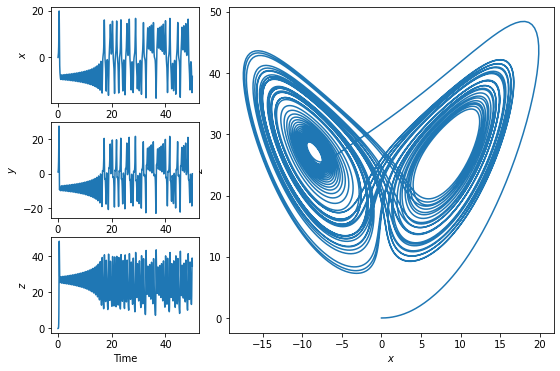

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# fixed parameters
sigma = 10
r = 28
b = 8.0/3.0

# the lorenz equations
f_x = lambda t, x_vec: sigma * (x_vec[1] - x_vec[0])
f_y = lambda t, x_vec: r * x_vec[0] - x_vec[1] - x_vec[0] * x_vec[2]
f_z = lambda t, x_vec: x_vec[0] * x_vec[1] - b * x_vec[2]

# starting conditions
x_vec_0 = np.array([0, 1, 0])

# vectorized derivative function
f = lambda t, x_vec: np.array([f_x(t, x_vec), f_y(t, x_vec), f_z(t, x_vec)])

t_points = np.linspace(0, 50, 10000)
solution = solve_ivp(f, (min(t_points), max(t_points)), x_vec_0, t_eval=t_points, vectorized=True)

fig = plt.figure(figsize=(9, 6))
gs = fig.add_gridspec(3, 3)

ax = fig.add_subplot(gs[:, 1:])
ax.plot(solution.y[0,:], solution.y[2, :])
ax.set_xlabel('$x$')
ax.set_ylabel('$z$')

ax_z = fig.add_subplot(gs[2, 0])
ax_y = fig.add_subplot(gs[1, 0], sharex=ax_z)
ax_x = fig.add_subplot(gs[0, 0], sharex=ax_z)
ax_x.plot(solution.t, solution.y[0,:])
ax_x.set_ylabel('$x$')
ax_y.plot(solution.t, solution.y[1,:])
ax_y.set_ylabel('$y$')
ax_z.plot(solution.t, solution.y[2,:])
ax_z.set_ylabel('$z$')
ax_z.set_xlabel('Time')

Text(0, 0.5, 'Displacement [m]')

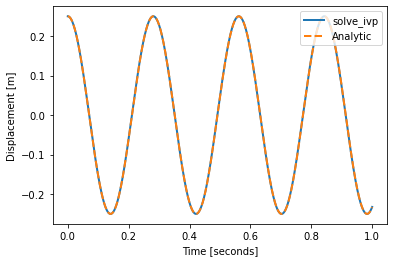

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

k = 750    # N/m
m = 1.5    # kg
x0 = 0.25  # m
v0 = 0.0   # m/s

ts = np.linspace(0, 1, 1000)
analytic_xs = x0 * np.cos(np.sqrt(k / m) * ts)

# f should give back array of [dx/dt, dv/dt], which is
# [v, -k/m x]. Assume input vector is in order [x, v],
# consistent with the order of the output derivatives,
# so x = x_vec[0], v = x_vec[1]
f = lambda t, x_vec: np.array([x_vec[1], -k / m * x_vec[0]])

solution = solve_ivp(f, (min(ts), max(ts)), np.array([x0, v0]), t_eval=ts, vectorized=True)

plt.plot(solution.t, solution.y[0,:], lw=2, label='solve_ivp')
plt.plot(ts, analytic_xs, ls='--', lw=2, label='Analytic')
plt.legend(loc='upper right')
plt.xlabel('Time [seconds]')
plt.ylabel('Displacement [m]')